In [10]:
from UZ_utils import *
from a3_utils import *
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt


In [11]:
def gausian_kernel(sigma,N=None):

    if N is None:
    #limit to  2 ∗ ⌈3σ⌉ + 1
        N = int(2*np.ceil(3*sigma)+1)

    else:
        N = N//2
    #create a kernel 1d from -N to N
    x = np.arange(-N,N+1)

    #calculate the kernel
    kernel = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-x**2/(2*sigma**2))

    #normalize the kernel
    kernel = kernel/np.sum(kernel)


    return (N,kernel)
    

In [12]:
#Implement a function that computes the derivative of a 1-D Gaussian kernel
def gaussdx(sigma,N=None):
    if N is None:
        N = int(2*np.ceil(3*sigma)+1)

    else:
        N = N//2
    
    x = np.arange(-N,N+1)

    kernel = -x/(np.sqrt(2*np.pi)*sigma**3)*np.exp(-x**2/(2*sigma**2))

    #normalize the kernel by dividing the values such that the sum of absolute values is 1
    kernel = kernel/np.sum(np.abs(kernel))

    return (N,kernel)



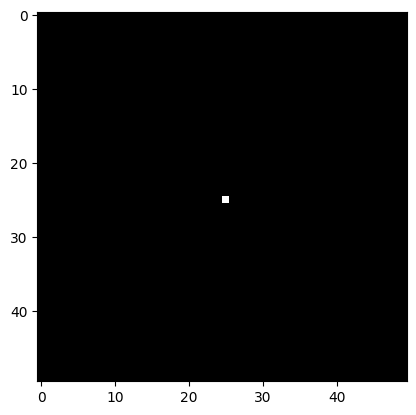

In [13]:
impulse = np.zeros((50, 50))
impulse[25, 25] = 1

#plot the impulse
plt.imshow(impulse, cmap='gray')

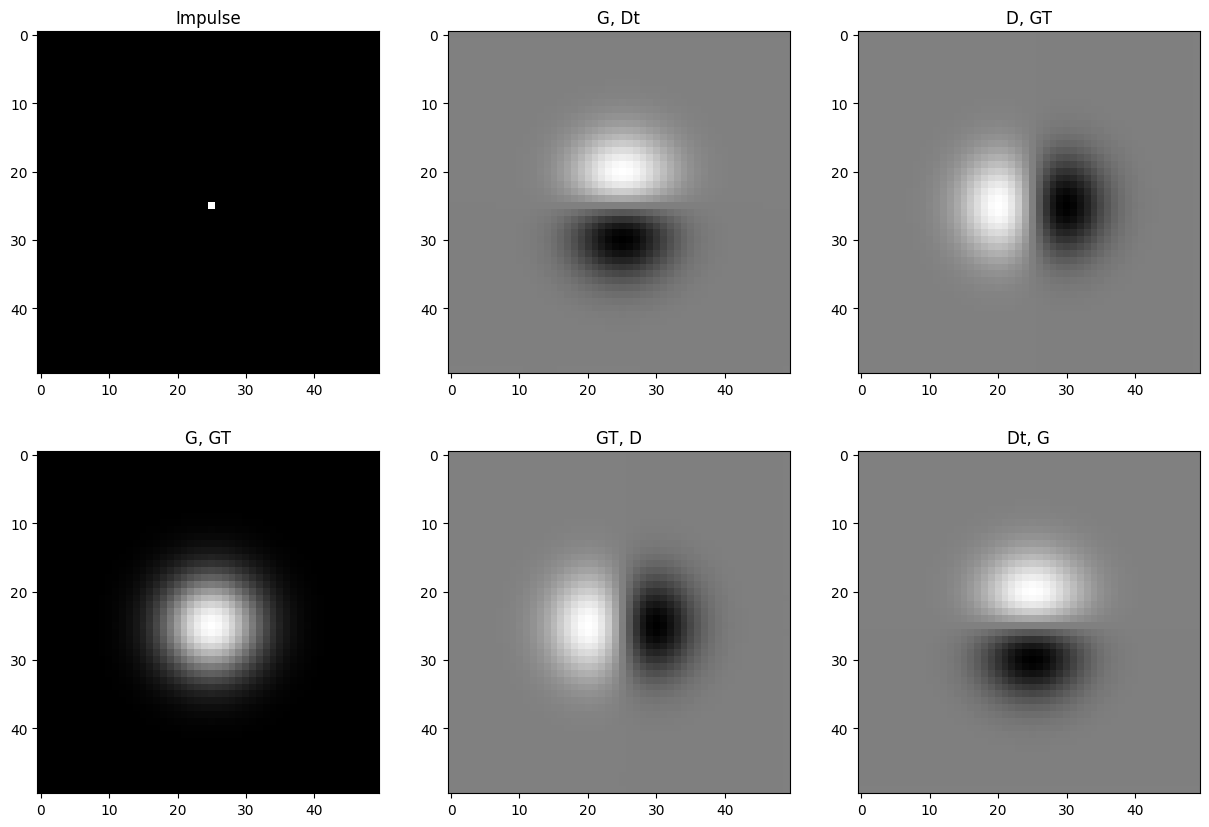

In [29]:
#First convolution with G and then convolution with GT
#use size 51 and sigma 5
#use cv2 filter2D function
k1=gausian_kernel(5,51)[1]
#make it into 2d
G=k1.reshape(1,-1)
GT=G.T

#flip the kernel
G=np.flip(G)
GT=np.flip(GT)

k2=gaussdx(5,51)[1]
#make it into 2d
D=k2.reshape(1,-1)
Dt=D.T

#flip the kernel
D=np.flip(D)
Dt=np.flip(Dt)

#make fig 3 wide 2 tall
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

#plot the impulse
ax[0,0].imshow(impulse, cmap='gray')
ax[0,0].set_title('Impulse')

#plot the impulse convolved with G then Dt
ax[0,1].imshow(cv2.filter2D(cv2.filter2D(impulse, cv2.CV_64F, G), cv2.CV_64F, Dt), cmap='gray')
ax[0,1].set_title('G, Dt')

#plot the impulse convolved with D then GT
ax[0,2].imshow(cv2.filter2D(cv2.filter2D(impulse, cv2.CV_64F, D), cv2.CV_64F, GT), cmap='gray')
ax[0,2].set_title('D, GT')

#plot the impulse convolved with G then Gt

ax[1,0].imshow(cv2.filter2D(cv2.filter2D(impulse, cv2.CV_64F, G), cv2.CV_64F, GT), cmap='gray')
ax[1,0].set_title('G, GT')

#plot the impulse convolved with GT THEN D

ax[1,1].imshow(cv2.filter2D(cv2.filter2D(impulse, cv2.CV_64F, GT), cv2.CV_64F, D), cmap='gray')
ax[1,1].set_title('GT, D')

#plot the impulse convolved with DT THEN G

ax[1,2].imshow(cv2.filter2D(cv2.filter2D(impulse, cv2.CV_64F, Dt), cv2.CV_64F, G), cmap='gray')
ax[1,2].set_title('Dt, G')

plt.show()




In [32]:
#Implement a function that uses functions gauss and gaussdx to compute both partial derivatives of a given image with respect to x and with respect to y.
def gaussderivatives(image, sigma):
    #get the kernel
    k1=gausian_kernel(sigma)[1]
    #make it into 2d
    G=k1.reshape(1,-1)
    GT=G.T

    #flip the kernel
    G=np.flip(G)
    GT=np.flip(GT)

    k2=gaussdx(sigma)[1]
    #make it into 2d
    D=k2.reshape(1,-1)
    Dt=D.T

    #flip the kernel
    D=np.flip(D)
    Dt=np.flip(Dt)

    #convolve the image with the kernels
    Ix=cv2.filter2D(cv2.filter2D(image, cv2.CV_64F, D), cv2.CV_64F, GT)
    Iy=cv2.filter2D(cv2.filter2D(image, cv2.CV_64F, G), cv2.CV_64F, Dt)

    return (Ix,Iy)

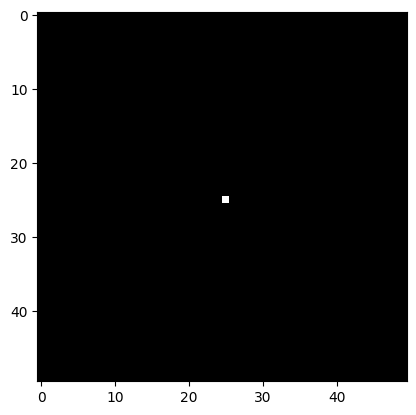

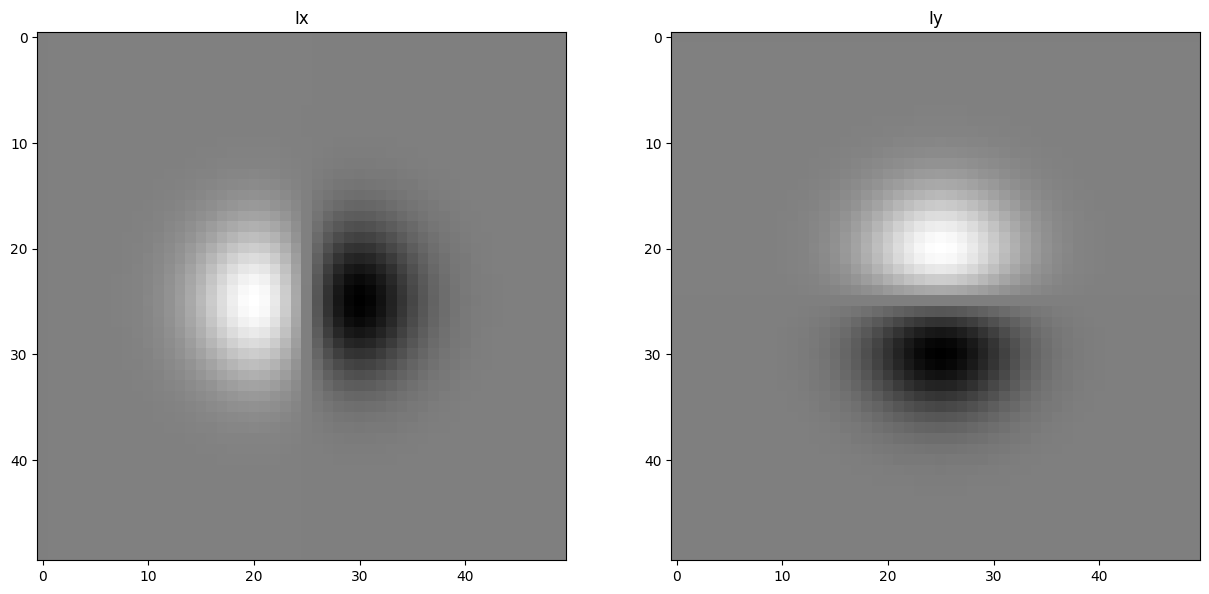

In [33]:
#inpulse
impulse = np.zeros((50, 50))
impulse[25, 25] = 1

#plot the impulse
plt.imshow(impulse, cmap='gray')

#compute the derivatives
Ix,Iy=gaussderivatives(impulse,5)

#plot the derivatives
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

#plot the impulse
ax[0].imshow(Ix, cmap='gray')
ax[0].set_title('Ix')

#plot the impulse
ax[1].imshow(Iy, cmap='gray')
ax[1].set_title('Iy')

plt.show()


In [35]:
def gradient_magnitude(I, sigma):
    #get the derivatives
    Ix,Iy=gaussderivatives(I,sigma)

    #compute the magnitude
    M=np.sqrt(Ix**2+Iy**2)

    fi=np.arctan2(Iy,Ix)

    return M,fi

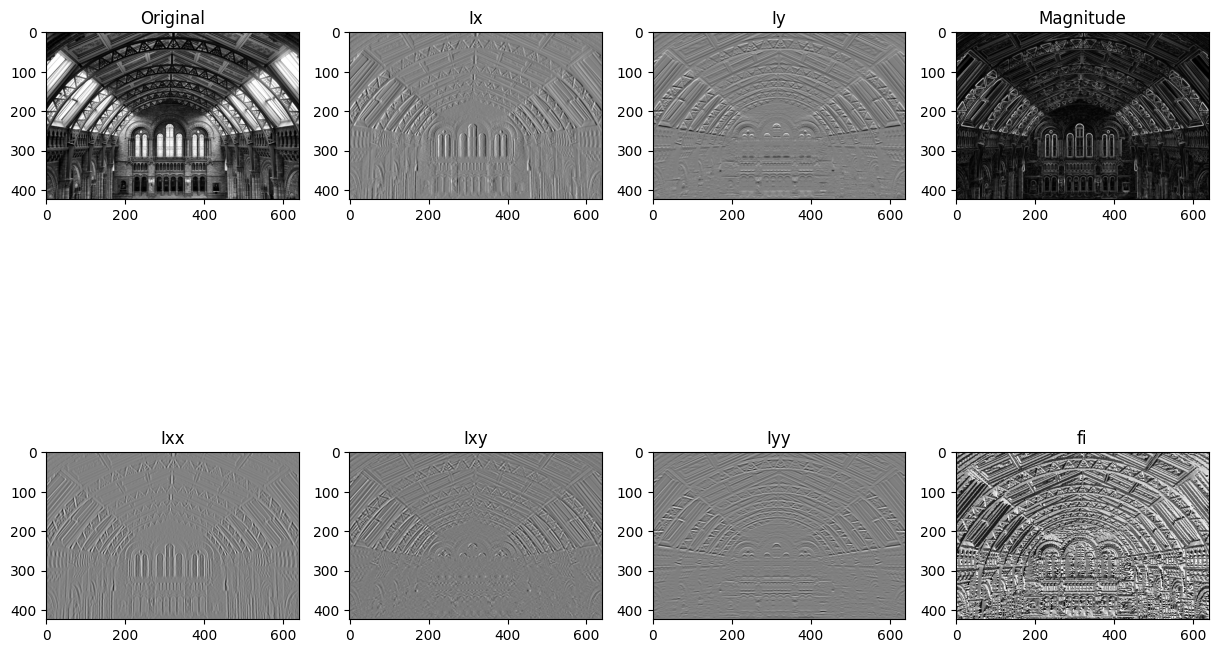

In [37]:
#Use all the implemented functions on the same image and display the results in the same window.
#load the image
I = imread_gray('images/museum.jpg')
#turn to int 255
I=I*255
I=I.astype(np.uint8)


Ix,Iy=gaussderivatives(I,1)
M,fi=gradient_magnitude(I,1)

#compute second derivatives with gaus deriv function
Ixx,Ixy=gaussderivatives(Ix,1)
Iyx,Iyy=gaussderivatives(Iy,1)

#make a 4 wide 2 tall figure
fig, ax = plt.subplots(2, 4, figsize=(15, 10))

#plot the image
ax[0,0].imshow(I, cmap='gray')
ax[0,0].set_title('Original')

#plot the Ix
ax[0,1].imshow(Ix, cmap='gray')
ax[0,1].set_title('Ix')

#plot the Iy
ax[0,2].imshow(Iy, cmap='gray')
ax[0,2].set_title('Iy')

#plot the magnitude
ax[0,3].imshow(M, cmap='gray')
ax[0,3].set_title('Magnitude')

#plot the Ixx
ax[1,0].imshow(Ixx, cmap='gray')
ax[1,0].set_title('Ixx')

#plot the Ixy
ax[1,1].imshow(Ixy, cmap='gray')
ax[1,1].set_title('Ixy')

#plot the Iyy
ax[1,2].imshow(Iyy, cmap='gray')
ax[1,2].set_title('Iyy')

#plot the fi
ax[1,3].imshow(fi, cmap='gray')
ax[1,3].set_title('fi')

plt.show()





# Exercize 2

In [79]:
def findedges1(I,sigma,theta):
    #create binary matrix 
    B=np.zeros(I.shape)

    #get the magnitude and fi
    M,fi=gradient_magnitude(I,sigma)
    #higher than threshold theta: 1 else 0
    B[M>theta]=1
    
    
    return B
    

In [138]:
def nonmaxima(I,sigma,theta):
    #create binary matrix 
    

    #get the magnitude and fi
    M,fi=gradient_magnitude(I,sigma)

    #threshold
    B=np.zeros(I.shape)
    B[M>theta]=1


    

    def angle_to_neighbors(angle):
        #get the angle
        angle=angle*180/np.pi

        #get the nearest angle
        if angle<0:
            angle=angle+360
        if angle>360:
            angle=angle-360

        neigbours=[]

        #get the nearest angle
        if angle>337.5 or angle<=22.5:
            #add x,y to the list
            neigbours.append((0,1))
        elif angle>22.5 and angle<=67.5:
            neigbours.append((1,1))
        elif angle>67.5 and angle<=112.5:
            neigbours.append((1,0))
        elif angle>112.5 and angle<=157.5:
            neigbours.append((-1,1))
        elif angle>157.5 and angle<=202.5:
            neigbours.append((0,-1))
        elif angle>202.5 and angle<=247.5:
            neigbours.append((-1,-1))
        elif angle>247.5 and angle<=292.5:
            neigbours.append((-1,0))
        elif angle>292.5 and angle<=337.5:
            neigbours.append((1,-1))

        return neigbours


    #implement non-maxima suppression based on the image deriva- tive magnitudes and angles.
    #Iterate through all the pixels and for each search its 8-neighborhood.
    #Check the neighboring pixels parallel to the gradient direction
    #and set the current pixel to 0 if it is not the largest in the neighborhood (based on derivative magnitude)

    #set low gradient to 0

    #make threshold
   

    non_maxima_suppression=B.copy() 


    for i in range(1,I.shape[0]-1):
        for j in range(1,I.shape[1]-1):
            
            #get the 8 neighbors of the current pixel 
            neigbours_with_angle=angle_to_neighbors(fi[i,j])
    
            #get the current pixel
            current_pixel=M[i,j]
            
            #loop through the neighbors
            for pos in neigbours_with_angle:
                #if the current pixel is smaller than the neighbor
                if current_pixel<B[i+pos[0],j+pos[1]]:
                    #set the current pixel to 0
                    non_maxima_suppression[i,j]=0
                    break

            

    return non_maxima_suppression

            
            

            


            



        


   

In [205]:
def hysteresis(I,sigma,theta,tlow,thigh):
    #create binary matrix 
    

    #get the magnitude and fi
    M,fi=gradient_magnitude(I,sigma)

    #threshold
    B=np.zeros(I.shape)
    B[M>theta]=1


    

    def angle_to_neighbors(angle):
        #get the angle
        angle=angle*180/np.pi

        #get the nearest angle
        if angle<0:
            angle=angle+360
        if angle>360:
            angle=angle-360

        neigbours=[]

        #get the nearest angle
        if angle>337.5 or angle<=22.5:
            #add x,y to the list
            neigbours.append((0,1))
        elif angle>22.5 and angle<=67.5:
            neigbours.append((1,1))
        elif angle>67.5 and angle<=112.5:
            neigbours.append((1,0))
        elif angle>112.5 and angle<=157.5:
            neigbours.append((-1,1))
        elif angle>157.5 and angle<=202.5:
            neigbours.append((0,-1))
        elif angle>202.5 and angle<=247.5:
            neigbours.append((-1,-1))
        elif angle>247.5 and angle<=292.5:
            neigbours.append((-1,0))
        elif angle>292.5 and angle<=337.5:
            neigbours.append((1,-1))

        return neigbours


    #implement non-maxima suppression based on the image deriva- tive magnitudes and angles.
    #Iterate through all the pixels and for each search its 8-neighborhood.
    #Check the neighboring pixels parallel to the gradient direction
    #and set the current pixel to 0 if it is not the largest in the neighborhood (based on derivative magnitude)

    #set low gradient to 0

    #make threshold
   

    non_maxima_suppression=B.copy() 
    non_maxima_suppressionOG=M.copy()


    for i in range(1,I.shape[0]-1):
        for j in range(1,I.shape[1]-1):
            
            #get the 8 neighbors of the current pixel 
            neigbours_with_angle=angle_to_neighbors(fi[i,j])
           
            #get the current pixel
            current_pixel=M[i,j]
            
            #loop through the neighbors
            for pos in neigbours_with_angle:
                #if the current pixel is smaller than the neighbor
                if current_pixel<B[i+pos[0],j+pos[1]]:
                    #set the current pixel to 0
                    non_maxima_suppression[i,j]=0
                    non_maxima_suppressionOG[i,j]=0
                    break

    #Canny’s algorithm is edge tracking by hysteresis.
    #Hysteresis uses two thresholds tlow < thigh, keeps all pixels above thigh and discards all pixels below tlow.
    #  The pixels between the thresholds are kept only if they are connected to a pixel above thigh.

    #use connected components to find the connected pixels
    #get the connected components cv2.connectedComponentsWithStats
    #get the labels


                

    #make a copy of the image
    hysteresissss=non_maxima_suppression.copy()

    #set all the pixels above the high threshold to 1
    hysteresissss[non_maxima_suppressionOG>thigh]=1

    #set all the pixels below the low threshold to 0
    hysteresissss[non_maxima_suppressionOG<tlow]=0


    #make image suitable for cv2.connectedComponentsWithStats
    hysteresissssimg=hysteresissss*255
    hysteresissssimg=hysteresissssimg.astype(np.uint8)

    #show the image
    plt.imshow(hysteresissssimg,cmap='gray')
    plt.title('hysteresissss')
    plt.show()
    
    num_labels,labels,stats,centroids=cv2.connectedComponentsWithStats(hysteresissssimg)
   
    #plot the connected components
    plt.imshow(labels)
    plt.show()

    

    #loop through the labels
    for i in range(1,num_labels):
        #get the label
        label=labels==i

        #if the label is not connected to a pixel above the high threshold
        if np.sum(label*non_maxima_suppressionOG>thigh)==0:
            #set the label to 0
            hysteresissss[label]=0

    


   
        

   
    return hysteresissss
        


            
            

            


            



        


   

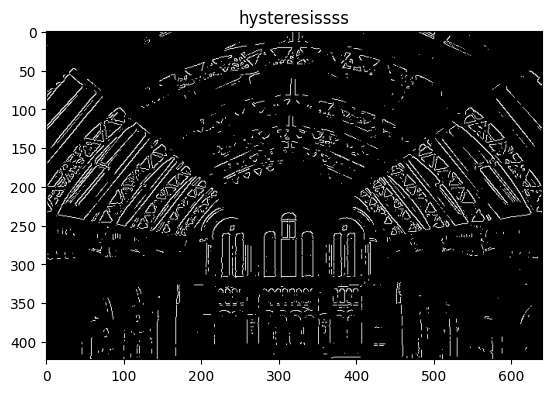

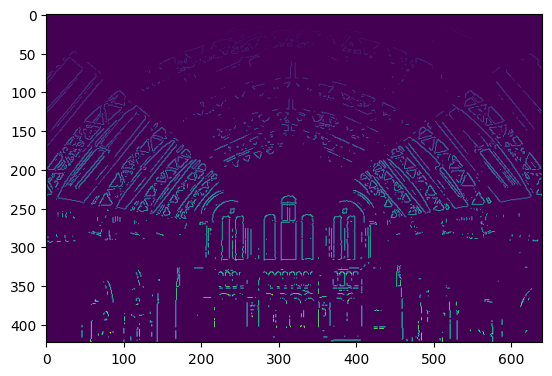

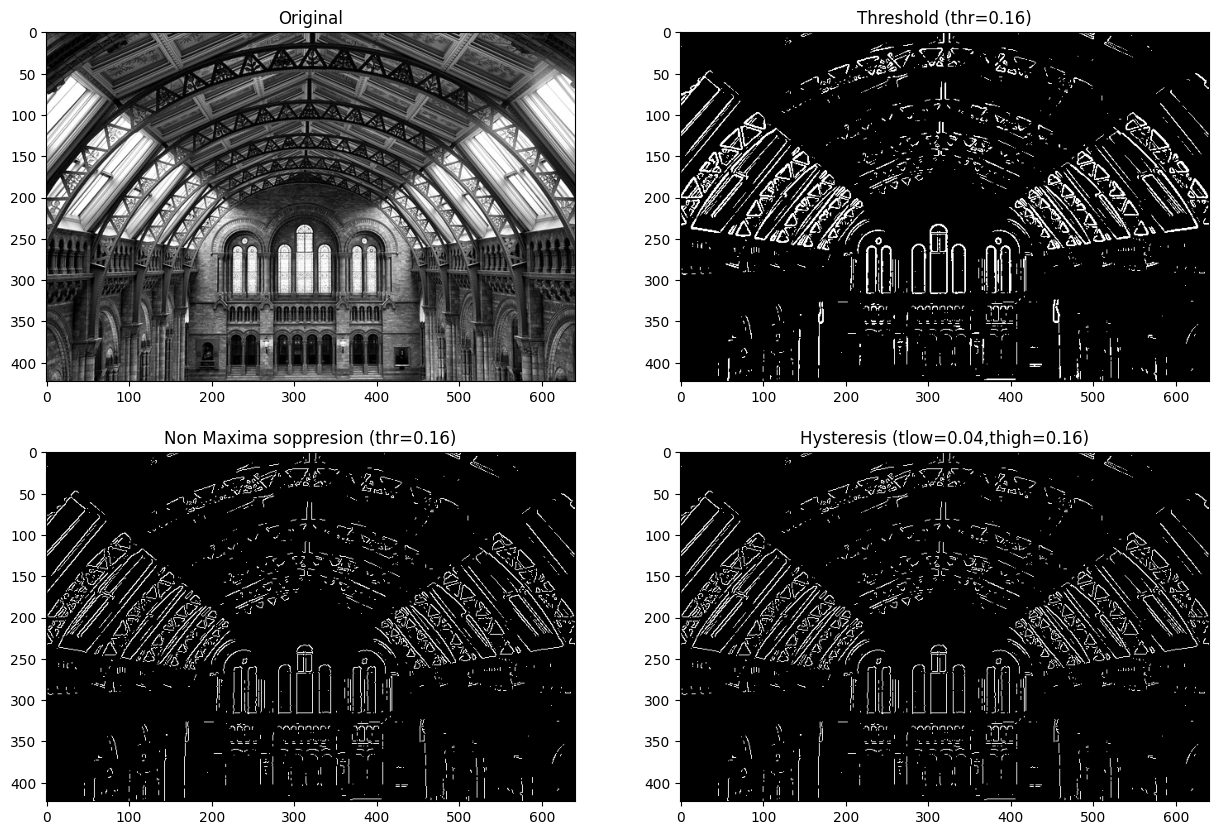

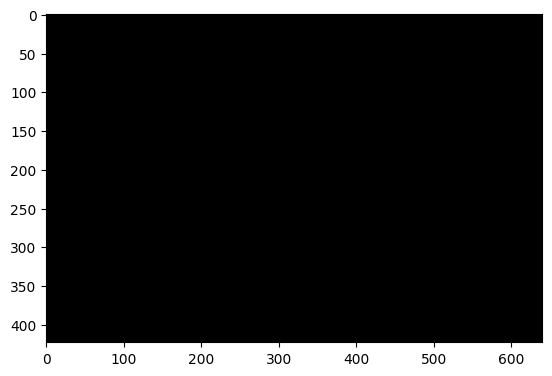

In [206]:
#oepn the image
I = imread_gray('images/museum.jpg')
#turn to int 255



onlyThreshold=findedges1(I,1,0.16)


nonMaxima=nonmaxima(I,1,0.16)

hysteresiss=hysteresis(I,1,0.16,0.04,0.16)


#make a 2 wide 2 tall figure
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

#plot the image
ax[0,0].imshow(I, cmap='gray')
ax[0,0].set_title('Original')

#plot the only threshold
ax[0,1].imshow(onlyThreshold, cmap='gray')
ax[0,1].set_title('Threshold (thr={})'.format(0.16))

#plot the non maxima
ax[1,0].imshow(nonMaxima, cmap='gray')
ax[1,0].set_title('Non Maxima soppresion (thr={})'.format(0.16))

#showw hysteresis
ax[1,1].imshow(hysteresiss, cmap='gray')
ax[1,1].set_title('Hysteresis (tlow={},thigh={})'.format(0.04,0.16))




plt.show()

#show difference beetwen non maxima and hysteresis
plt.imshow(nonMaxima-hysteresiss, cmap='gray')
plt.show()



